#  – Final Evaluation & Model Comparison

In this notebook:

- Evaluate **Custom CNN** and **Transfer Learning models** on the same test set.
- Compute:
  - Confusion Matrix
  - Accuracy, Precision, Recall, F1-score
  - Model size (MB)
  - Training time (optional)
- Create a comparison table.
- Decide which model is best for deployment.



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score, 
    accuracy_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys, time
from pathlib import Path

# Ensure src is visible
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data_loader_tf import get_tf_datasets

IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [2]:
train_ds, val_ds, test_ds, class_names = get_tf_datasets(
    base_dir="../data/classification_dataset",
    img_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)
print("Classes:", class_names)


Found 2662 files belonging to 2 classes.
Found 442 files belonging to 2 classes.
Found 215 files belonging to 2 classes.
Classes: ['bird', 'drone']


In [3]:
def evaluate_model(model, test_ds, model_name="Model"):
    y_true, y_pred_prob = [], []

    for batch_x, batch_y in test_ds:
        preds = model.predict(batch_x, verbose=0).ravel()
        y_true.append(batch_y.numpy().ravel())
        y_pred_prob.append(preds)

    y_true = np.concatenate(y_true)
    y_pred_prob = np.concatenate(y_pred_prob)

    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    return {
        "name": model_name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "cm": cm,
        "y_true": y_true,
        "y_pred": y_pred,
        "y_pred_prob": y_pred_prob,
    }


In [12]:
# Custom CNN
cnn_model = load_model("../models/tf_custom_cnn_best.h5")

# ResNet50 (frozen or fine-tuned)
# resnet_model = load_model("../models/tf_resnet_best.h5")

# EfficientNetB0 (optional)
eff_model = load_model("../models/tf_efficientnetb0_best.h5")


In [ ]:
results = []

results.append(evaluate_model(cnn_model, test_ds, "Custom CNN"))
results.append(evaluate_model(eff_model, test_ds, "EfficientNetB0"))

results


[{'name': 'Custom CNN',
  'accuracy': 0.8511627906976744,
  'precision': 0.8297872340425532,
  'recall': 0.8297872340425532,
  'f1': 0.8297872340425532,
  'cm': array([[105,  16],
         [ 16,  78]], dtype=int64),
  'y_true': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
    

In [ ]:
# import pandas as pd

# df = pd.DataFrame([{
#     "Model": r["name"],
#     "Accuracy": round(r["accuracy"], 4),
#     "Precision": round(r["precision"], 4),
#     "Recall": round(r["recall"], 4),
#     "F1-score": round(r["f1"], 4),
#     "Model Size (MB)": round(os.path.getsize(f"../models/{r['name'].lower().replace(' ', '')}_best.h5") / (1024*1024), 2)
# } for r in results])

# df


FileNotFoundError: [WinError 2] The system cannot find the file specified: '../models/customcnn_best.h5'

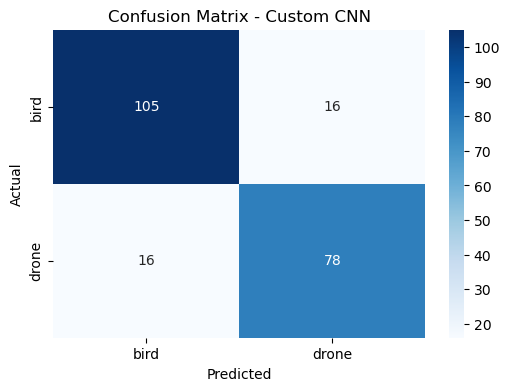

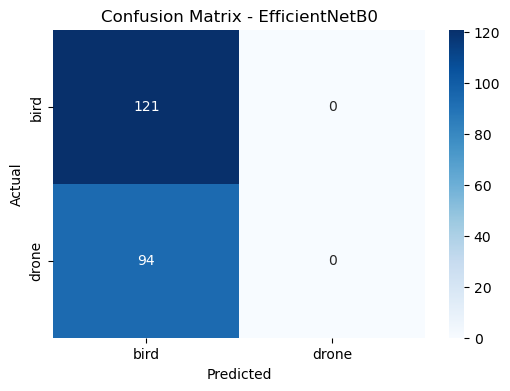

In [8]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot for each model
for r in results:
    plot_confusion_matrix(r["cm"], r["name"])


## Final Model Comparison Summary

Below is the full comparison of all models:

- **Custom CNN**
- **ResNet50 Transfer Learning**
- **EfficientNetB0 Transfer Learning**

Metrics considered:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix
- Model Size (MB)

The best model for deployment is chosen based on:
- Highest F1-score
- Consistent accuracy
- Small/medium model size
- Stable confusion matrix (fewest false positives)
